<a href="https://colab.research.google.com/github/nayonsoso/Pytorch/blob/main/tsaug%20%EC%8B%A4%ED%96%89%EC%98%88%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tsaug

tsaug는 시계열 데이터 증강을 위한 파이토치 패키지이다.

## installation

① tsaug 설치

② 드라이브 마운트 - 실습 깃허브 파일 다운로드

③ 드라이브 내부에서 실행 경로 설정

In [ ]:
!pip install tsaug

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install
"""
!cd "/content/drive/MyDrive/Colab Notebooks/22 봄 학부연구생"
!git clone https://github.com/arundo/tsaug.git
!cd tsaug/
!git checkout develop
!pip install ./
"""

fatal: destination path 'tsaug' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git
ERROR: Directory './' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
# 실행 경로 설정
%cd "/content/drive/MyDrive/Colab Notebooks/22 봄 학부연구생/tsaug/docs/notebook"

/content/drive/MyDrive/Colab Notebooks/22 봄 학부연구생/tsaug/docs/notebook


## 다변수 시계열 데이터 증강

### Load

(<Figure size 1152x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff410ee1d10>,
       dtype=object))

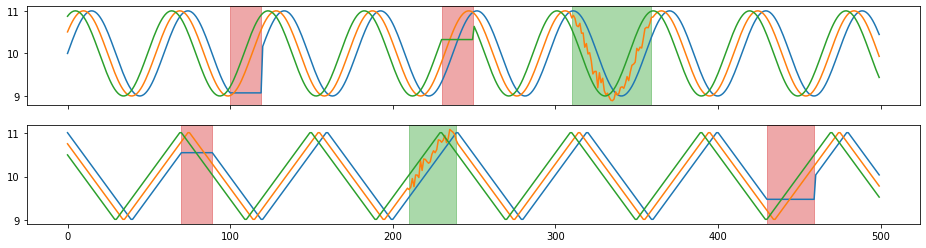

In [ ]:
import numpy as np
X = np.load("X.npy")
Y = np.load("Y.npy")
from tsaug.visualization import plot
plot(X, Y)

### Augmentation

tsaug에서 제공하는 함수를 이용해 데이터를 증강시켜보자.

각 예시에서 **위의 두 플롯은 원본 데이터**이고 **아래 두 플롯은 증강한 데이터**이다.

- AddNoise : 노이즈 삽입

- wrapping : 왜곡

- crop : 자르기

- quantize : 양자화 = 적은 비트로 매핑

- drift : 이동시키기

- reverse : 뒤집기

(<Figure size 1152x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3fcb3cc50>,
       dtype=object))

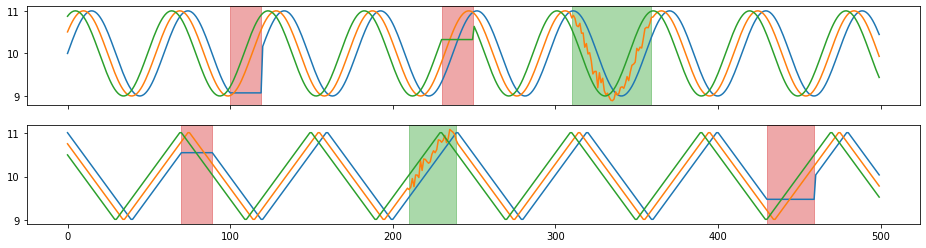

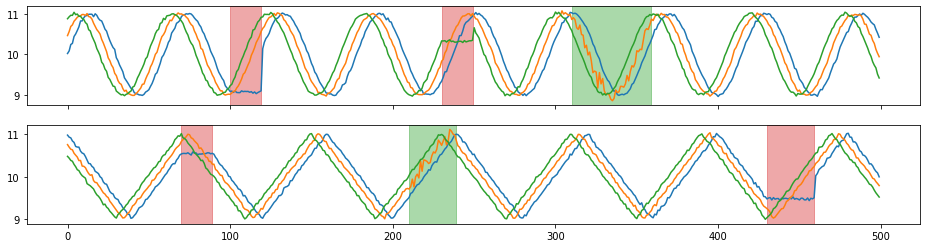

In [45]:
# AddNoise - 노이즈 삽입
import tsaug
X_aug, Y_aug = tsaug.AddNoise(scale=0.01).augment(X, Y)

plot(X, Y)
plot(X_aug, Y_aug)

(<Figure size 1152x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3fc97a910>,
       dtype=object))

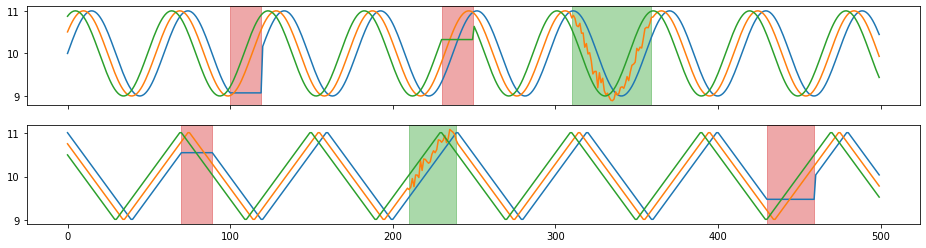

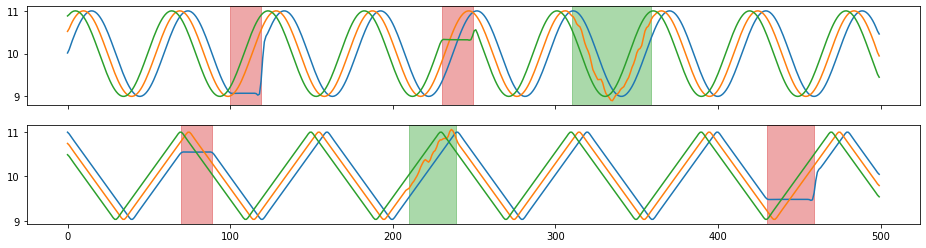

In [46]:
# Convolve - 합성곱
X_aug, Y_aug = tsaug.Convolve(window="flattop", size=11).augment(X, Y)

plot(X, Y)
plot(X_aug, Y_aug)

(<Figure size 1152x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3fc7b3190>,
       dtype=object))

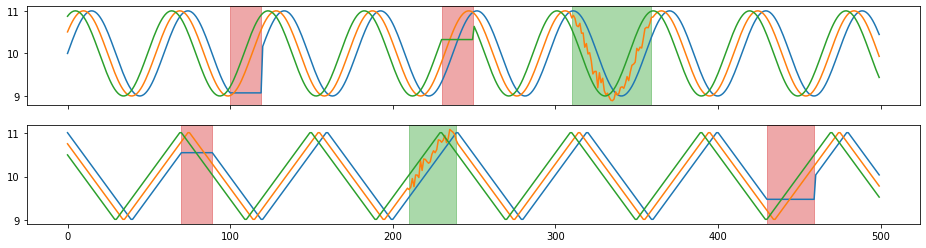

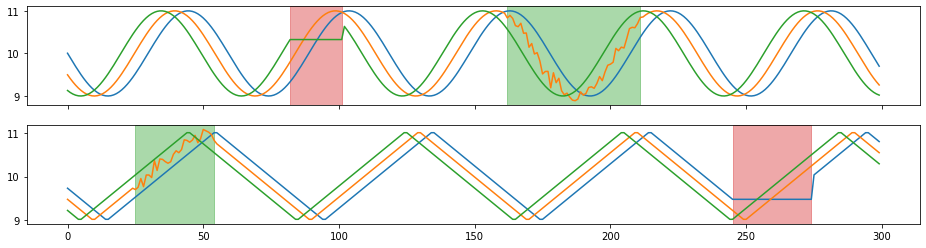

In [47]:
# Crop - 자르기
X_aug, Y_aug = tsaug.Crop(size=300).augment(X, Y)

plot(X, Y)
plot(X_aug, Y_aug)

(<Figure size 1152x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3fc52a490>,
       dtype=object))

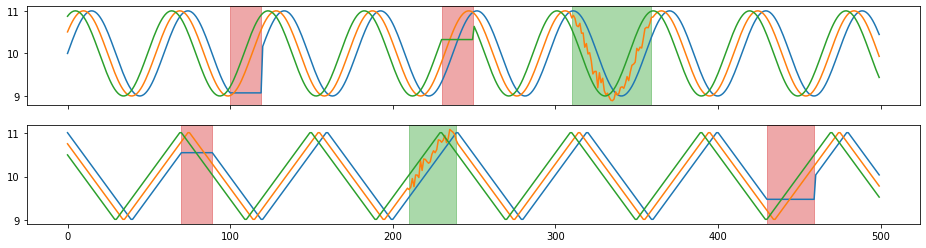

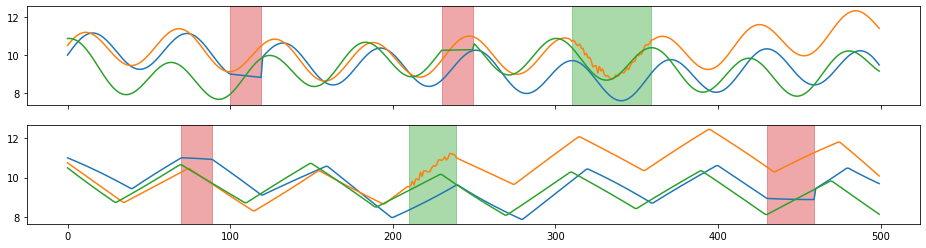

In [49]:
# Drift - 이동시키기
X_aug, Y_aug = tsaug.Drift(max_drift=0.7, n_drift_points=5).augment(X, Y)

plot(X, Y)
plot(X_aug, Y_aug)

(<Figure size 1152x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3fca5e850>,
       dtype=object))

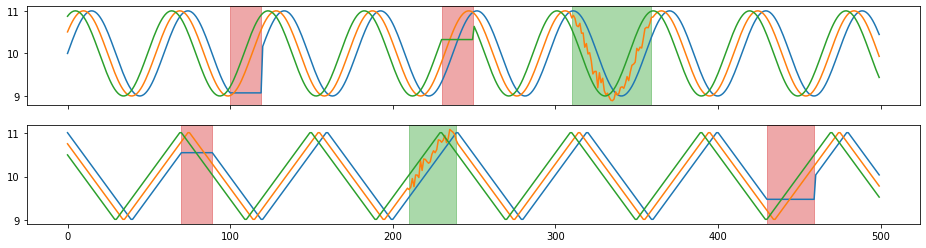

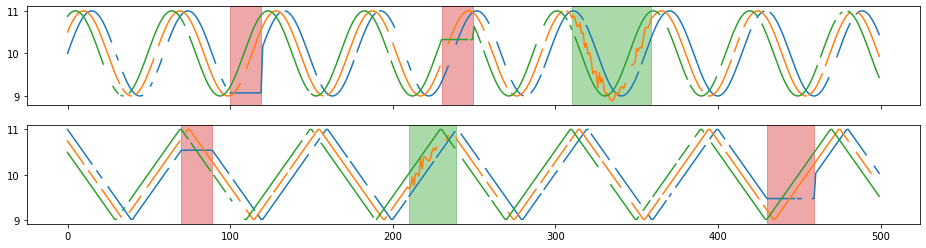

In [51]:
# Dropout - 랜덤하게 값 버리기
X_aug, Y_aug = tsaug.Dropout(p=0.1, size=(1,5), fill=float("nan"), per_channel=True).augment(X, Y)

plot(X, Y)
plot(X_aug, Y_aug)

(<Figure size 1152x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3fce29c10>,
       dtype=object))

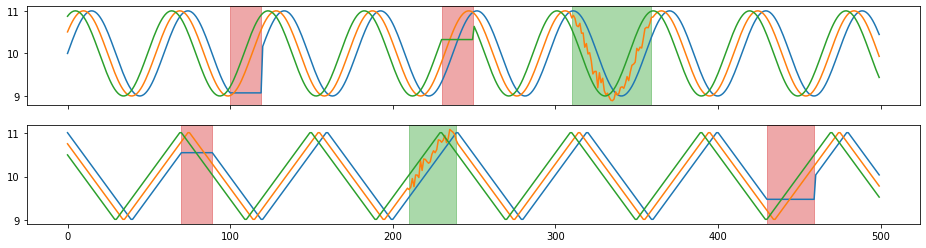

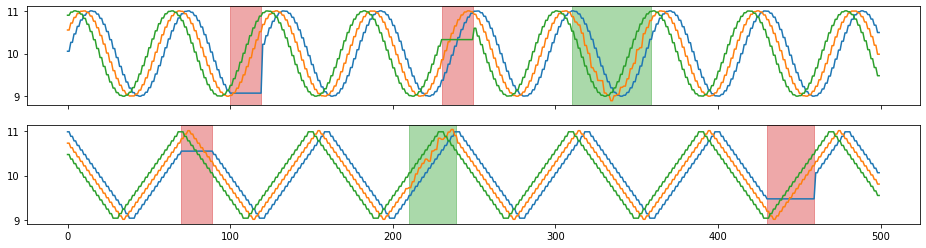

In [52]:
# Pool - 해상도 낮추기
X_aug, Y_aug = tsaug.Pool(size=2).augment(X, Y)

plot(X, Y)
plot(X_aug, Y_aug)

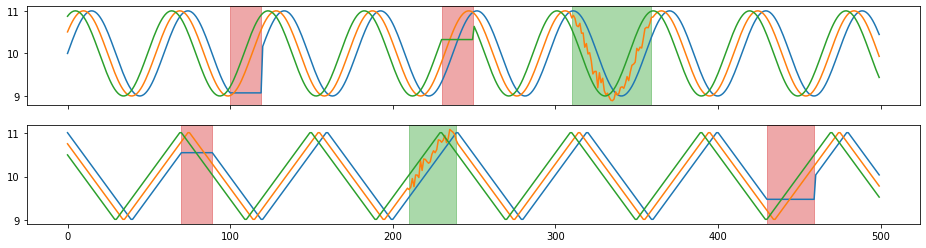

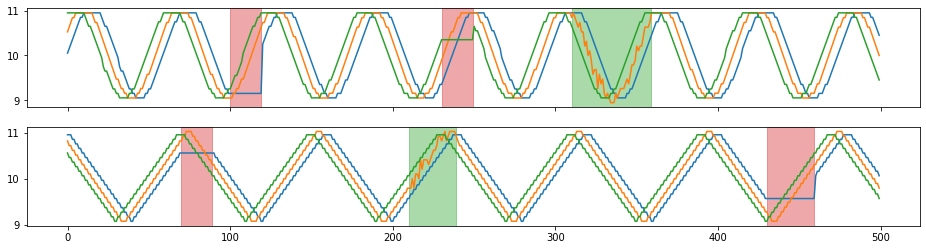

In [53]:
# Quantize - level set으로 양자화
X_aug, Y_aug = tsaug.Quantize(n_levels=20).augment(X, Y)

plot(X, Y)
plot(X_aug, Y_aug)

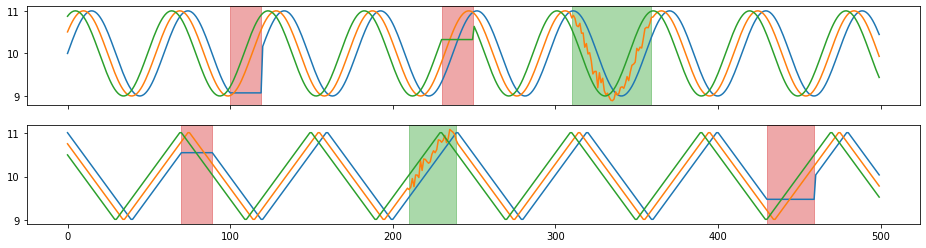

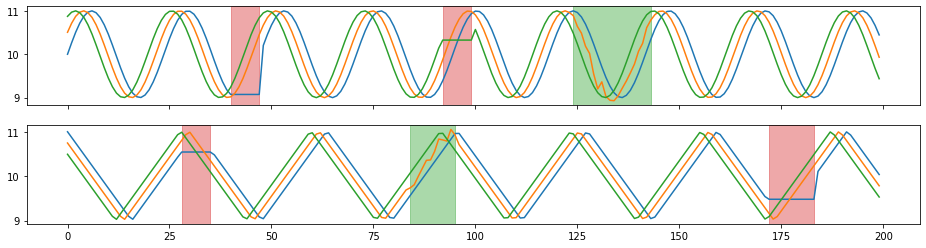

In [55]:
# Resize - 원본 데이터의 보간에 포함되도록 크기 재설정
X_aug, Y_aug = tsaug.Resize(size=200).augment(X, Y)

plot(X, Y)
plot(X_aug, Y_aug)

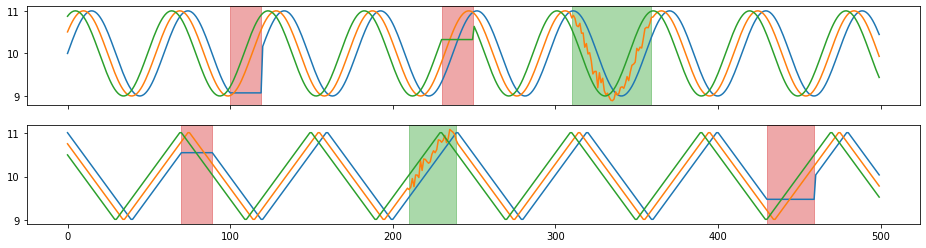

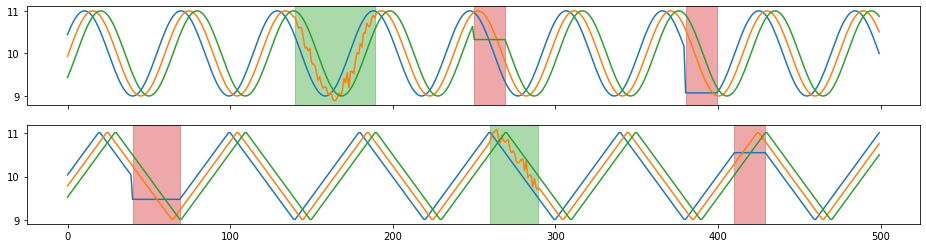

In [56]:
# Reverse - 타임라인 뒤집기
X_aug, Y_aug = tsaug.Reverse().augment(X, Y)

plot(X, Y)
plot(X_aug, Y_aug)

(<Figure size 1152x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3fc2a2290>,
       dtype=object))

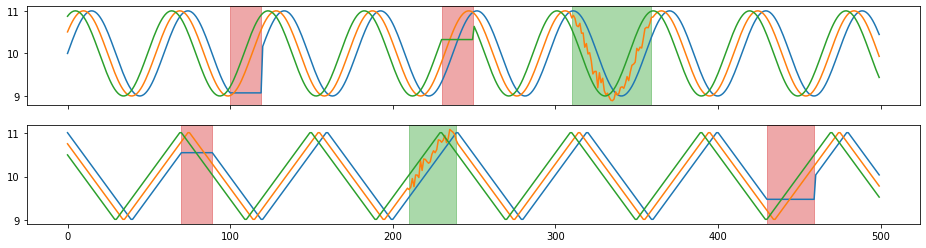

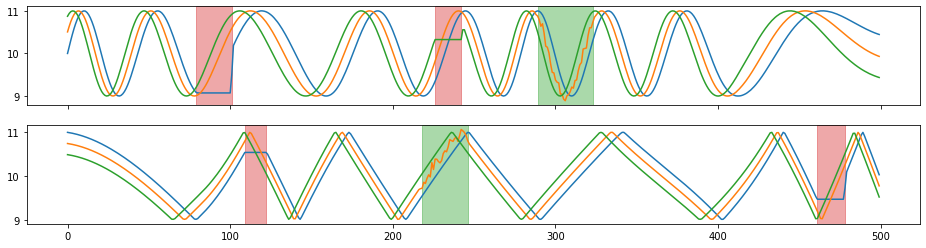

In [57]:
# TimeWarp - 랜덤하게 타임라인의 속도를 조절
X_aug, Y_aug = tsaug.TimeWarp(n_speed_change=5, max_speed_ratio=3).augment(X, Y)

plot(X, Y)
plot(X_aug, Y_aug)